### Importing the Libraries

I usually import libraries on the go. So, look out for that.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", 100)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Changing the directory
import os
os.chdir("/Users/ashishsrimal/Phase1Code/GreyAtom/data")
#Reading Training data
data = pd.read_csv("train.csv", delimiter=",")
#data.head(10)

In [4]:
#Dropping ID columns as its not required for modelling.
data.drop(["Id"], inplace=True, axis=1)

In [5]:
#Checking for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Fortunately we dont have missing values.But be careful, it may be a trap.

In [6]:
#Looking at Categorical and Numerical values
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
print(numerical_col)
categorical_col = data.select_dtypes(exclude=np.number).columns.tolist()
print(categorical_col)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [7]:
#For looking at percent of missing value,usually if its more than 70% we tend to drop the column completely
x = data.isnull().sum()
y = data.isnull().count()
z = (x/y)*100
missing_data = pd.concat([x,z], keys=["Number of Missing Value", "Percentage"], axis=1)
missing_data

In [8]:
#removing the columns which has more than 70% of data missing
a1 = missing_data[missing_data["Percentage"]>0.7].index
data = data.drop(a1, axis=1)
#data.isnull().sum().sort_values(ascending = False)

In [9]:
#If there is null values in the data, will replace with mean, but there are other methods too.
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls = nulls[nulls>0]
nulls.columns = ["Null Counts"]
nulls.index.name = "Feature"

for cols in nulls[nulls["Null Counts"]>0].index:
    data[cols].fillna(data[cols].mean(), inplace=True)

In [10]:
#Checking the Imbalancing of the data
#data["y"].value_counts()/data["y"].value_counts().sum()*100
data["y"].value_counts(normalize=True)*100

no     88.734446
yes    11.265554
Name: y, dtype: float64

### So, as you can see we have perfect Imbalance data. We will tackle this problem later in the code.

#### Outliers are the thing which we have to look out for. So, lets see how many outliers are there in out attributes

In [11]:
cols = list(data)
outliers = pd.DataFrame(['Features','Number of Outliers'])
for column in cols:
    if column in data.select_dtypes(include=np.number).columns:
        
        q1 = data[column].quantile(0.25)
        
        q3 = data[column].quantile(0.75)
        
        iqr = q3 - q1
        
        fence_low = q1 - (1.5*iqr)
        fence_above = q3 + (1.5*iqr)
        
        outliers = outliers.append({'Feature':column,'Number of Outliers':data.loc[(data[column] < fence_low) | (data[column] > fence_above)].shape[0]},ignore_index=True)

outliers.drop(0, axis=1, inplace=True)
outliers.dropna(axis=0, inplace=True)
outliers

,Feature,Number of Outliers
2,age,368.0
3,duration,2366.0
4,campaign,1916.0
5,pdays,1226.0
6,previous,4534.0
7,emp.var.rate,0.0
8,cons.price.idx,0.0
9,cons.conf.idx,359.0
10,euribor3m,0.0
11,nr.employed,0.0


#### So, there are hell lot of outliers. Or we can say there might be good amount of skewness in the attributes.

### So, lets visualize it through some plots and graphs

## Univariate analysis of Categorical Data only

In [12]:
# Function to perform univariate analysis of categorical columns
categorical_col = data.select_dtypes(include=['object']).columns

for i in range(0, len(categorical_col),2):
    if len(categorical_col) > i+1:
        
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        data[categorical_col[i]].value_counts(normalize=True).plot(kind='bar')
        plt.title(categorical_col[i])
        plt.subplot(122)
        data[categorical_col[i+1]].value_counts(normalize=True).plot(kind='bar')
        plt.title(categorical_col[i+1])
        plt.tight_layout()
        print(plt.show())
        
    else:
        data[categorical_col[i]].value_counts(normalize=True).plot(kind='bar')
        plt.title(categorical_col[i])

### Imputing unknown values of categorical columns
In the previous task we have seen some categorical variables have a value called unknown. unknown values are a kind of missing data. Depending on the use case, we can decide how to deal with these values. One method is to directly impute them with the mode value of respective columns.

The code below imputes the value unknown in the categorical columns with the mode value of that column. You can modify this function to replace any unwanted value(for e.g NaN value) in a column with a value of your choice.

In [13]:
#Just replacing "Unknown" entry into column value mode.
cols = list(data)
for col in cols:
    if col in data.select_dtypes(exclude=np.number).columns:
        data[col] = data[col].str.replace("unknown", data[col].mode()[0])

### Univariate analysis of Numerical columns

In [14]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

for i in range(0, len(numerical_col), 2):
    if len(numerical_col) > i+1:
        
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(data[numerical_col[i]], kde=False)
        plt.title(numerical_col[i])
        plt.subplot(122)
        sns.distplot(data[numerical_col[i+1]], kde=False)
        plt.title(numerical_col[i])
        plt.tight_layout()
        plt.show()
        
    else:
        sns.distplot(x=data[numerical_col[i]], kde=False)
        plt.title(numerical_col[i])

In [15]:
#Some Box plot for better visual

for i in range(0, len(numerical_col), 2):
    if len(numerical_col) > i+1:
        
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(data[numerical_col[i]])
        plt.title(numerical_col[i])
        plt.subplot(122)
        sns.boxplot(data[numerical_col[i+1]])
        plt.title(numerical_col[i])
        plt.tight_layout()
        plt.show()
        
    else:
        sns.distplot(x=data[numerical_col[i]])
        plt.title(numerical_col[i])

Observation :


As we can see from the histogram, the features age, duration and campaign are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features. We will deal with these outliers in the steps below.
Looking at the plot for pdays, we can infer that majority of the customers were being contacted for the first time because as per the feature description for pdays the value 999 indicates that the customer had not been contacted previously.
Since the features pdays and previous consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [16]:
#dropping the two columns
data.drop(['pdays','previous'],1,inplace=True)

## Bivariate Analysis

In [17]:
categorical_col = data.select_dtypes(exclude=np.number).columns.tolist()

In [18]:
for i in range(0, len(categorical_col),2):
    if len(categorical_col) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.countplot(x=data[categorical_col[i]], hue=data["y"], data= data)
        plt.xticks(rotation=90)
        plt.subplot(122)
        sns.countplot(x=data[categorical_col[i+1]], hue=data["y"], data = data)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

## Treating Outliers

Outliers can be treated in a variety of ways. It depends on the skewness of the feature.


To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.


To reduce left skewness, we take squares or cubes or higher powers.
But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.


Hence for this data we use a method called <b>Winsorization</b>. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots

In [19]:
from scipy.stats.mstats import winsorize
cols = list(data)

for col in cols:
    if col in data.select_dtypes(include=np.number).columns:
        data[col] = winsorize(data[col], limits=[0.05,0.1], inclusive=(True, True))

In [20]:
#Rechecking the outliers

cols = list(data)
outliers = pd.DataFrame(['Features','Number of Outliers'])
for column in cols:
    if column in data.select_dtypes(include=np.number).columns:
        
        q1 = data[column].quantile(0.25)
        
        q3 = data[column].quantile(0.75)
        
        iqr = q3 - q1
        
        fence_low = q1 - (1.5*iqr)
        fence_above = q3 + (1.5*iqr)
        
        outliers = outliers.append({'Feature':column,'Number of Outliers':data.loc[(data[column] < fence_low) | (data[column] > fence_above)].shape[0]},ignore_index=True)
outliers.drop(0, axis=1, inplace=True)
outliers.dropna(axis=0, inplace=True)
outliers

,Feature,Number of Outliers
2,age,0.0
3,duration,0.0
4,campaign,0.0
5,emp.var.rate,0.0
6,cons.price.idx,0.0
7,cons.conf.idx,0.0
8,euribor3m,0.0
9,nr.employed,0.0


### OneHotEncoding and LabelEncoder

In [21]:
#OneHotEncoding and Label Encoder
#Label Encoder will assign number to objects
#OneHotEncoding will create dummies for the nominal categories

col_to_encode = list(data.select_dtypes(include=["category", "object"]))
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

le = LabelEncoder()
for features in col_to_encode:
    try:
        data[features] = le.fit_transform(data[features])
        print("Encoding done for " + features)
    except:
        print("Error in encoding" + features)

Encoding done for job
Encoding done for marital
Encoding done for education
Encoding done for default
Encoding done for housing
Encoding done for loan
Encoding done for contact
Encoding done for month
Encoding done for day_of_week
Encoding done for poutcome
Encoding done for y


### Vanilla models

In [22]:
#Segragating Independent and Dependent values
X = data.iloc[:,:-1]

In [23]:
y = data.iloc[:,-1]

In [24]:
#importiing libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error,accuracy_score

LogisticRegression()

Confusion Metrics


array([[5617,  181],
       [ 526,  266]])

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.60      0.34      0.43       792

    accuracy                           0.89      6590
   macro avg       0.75      0.65      0.69      6590
weighted avg       0.88      0.89      0.88      6590

ROC_AUC_Score 0.6523204622980406


Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC_AUC_Curve')

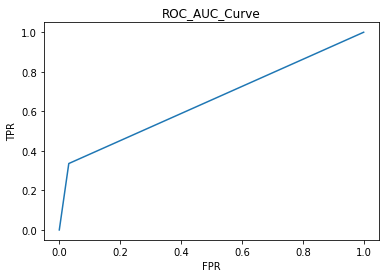

In [25]:
#Splitting the data in 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


#Vanilla Model with Logistic Regression
model = LogisticRegression()

#Fitting the model
model.fit(X_train, y_train)

#Predicting
y_scores = model.predict(X_test)

#confusion metrics
print("Confusion Metrics")
confusion_matrix(y_test, y_scores)

#Classification Report
print("Classification Report")
print(classification_report(y_test, y_scores))

#ROC -Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
print("ROC_AUC_Score", roc_auc_score(y_test, y_scores))

#plotting
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC_Curve")
plt.show()

DecisionTreeClassifier()

Confusion Metrics


array([[5412,  386],
       [ 394,  398]])

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5798
           1       0.51      0.50      0.51       792

    accuracy                           0.88      6590
   macro avg       0.72      0.72      0.72      6590
weighted avg       0.88      0.88      0.88      6590

ROC_AUC_Score 0.7179752858003978


Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC_AUC_Curve')

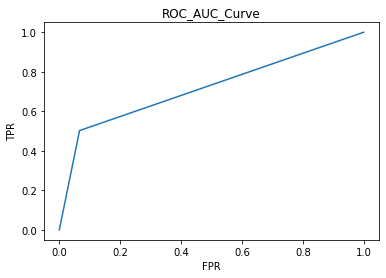

In [26]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

#Fitting the model
model.fit(X_train, y_train)

#Predicting
y_scores = model.predict(X_test)

#confusion metrics
print("Confusion Metrics")
confusion_matrix(y_test, y_scores)

#Classification Report
print("Classification Report")
print(classification_report(y_test, y_scores))

#ROC -Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
print("ROC_AUC_Score", roc_auc_score(y_test, y_scores))

#plotting
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC_Curve")
plt.show()

RandomForestClassifier()

Confusion Metrics


array([[5584,  214],
       [ 417,  375]])

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5798
           1       0.64      0.47      0.54       792

    accuracy                           0.90      6590
   macro avg       0.78      0.72      0.74      6590
weighted avg       0.90      0.90      0.90      6590

ROC_AUC_Score 0.7182877847115516


Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC_AUC_Curve')

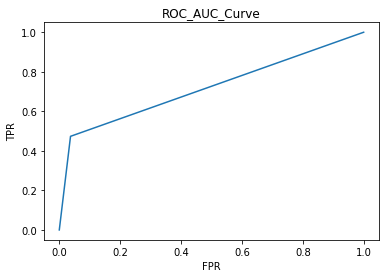

In [27]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

model = RandomForestClassifier()

#Fitting the model
model.fit(X_train, y_train)

#Predicting
y_scores = model.predict(X_test)

#confusion metrics
print("Confusion Metrics")
confusion_matrix(y_test, y_scores)

#Classification Report
print("Classification Report")
print(classification_report(y_test, y_scores))

#ROC -Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
print("ROC_AUC_Score", roc_auc_score(y_test, y_scores))

#plotting
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC_Curve")
plt.show()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Confusion Metrics


array([[5554,  244],
       [ 387,  405]])

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5798
           1       0.62      0.51      0.56       792

    accuracy                           0.90      6590
   macro avg       0.78      0.73      0.75      6590
weighted avg       0.90      0.90      0.90      6590

ROC_AUC_Score 0.7346400796512903


Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC_AUC_Curve')

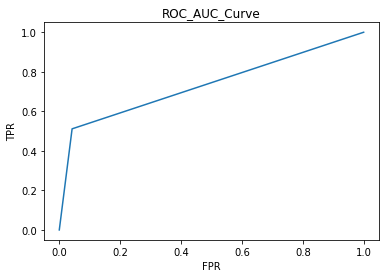

In [28]:
#XGBoost classifier
from xgboost import XGBClassifier

model = XGBClassifier()

#Fitting the model
model.fit(X_train, y_train)

#Predicting
y_scores = model.predict(X_test)

#confusion metrics
print("Confusion Metrics")
confusion_matrix(y_test, y_scores)

#Classification Report
print("Classification Report")
print(classification_report(y_test, y_scores))

#ROC -Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
print("ROC_AUC_Score", roc_auc_score(y_test, y_scores))

#plotting
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC_Curve")
plt.show()

GradientBoostingClassifier()

Confusion Metrics


array([[5609,  189],
       [ 446,  346]])

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5798
           1       0.65      0.44      0.52       792

    accuracy                           0.90      6590
   macro avg       0.79      0.70      0.73      6590
weighted avg       0.89      0.90      0.90      6590

ROC_AUC_Score 0.7021356197365166


Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC_AUC_Curve')

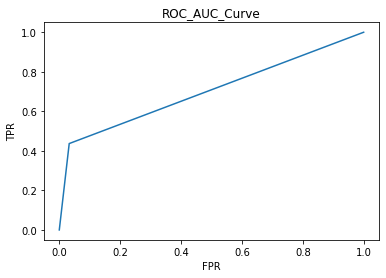

In [29]:
#GradientBoosting Classifier
model = GradientBoostingClassifier()

#Fitting the model
model.fit(X_train, y_train)

#Predicting
y_scores = model.predict(X_test)

#confusion metrics
print("Confusion Metrics")
confusion_matrix(y_test, y_scores)

#Classification Report
print("Classification Report")
print(classification_report(y_test, y_scores))

#ROC -Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
print("ROC_AUC_Score", roc_auc_score(y_test, y_scores))

#plotting
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC_Curve")
plt.show()

## Implementing Recursive Feature Elimination (RFE)

For selecting definite set of independant attribute, we are using RFE.

In [30]:
#Out of 18 independent variables, we will take only 8 variable depending on its importance
#One thing to note as we use different model, the feature selected by RFE function will vary.

#For Logistic Classifier
model_LR = LogisticRegression()

rfe = RFE(model_LR, 8)
rfe = rfe.fit(X,y)

feature_rank = pd.Series(rfe.ranking_, index=X.columns)
#Taking feature which has 1 rank
data_feature = feature_rank[feature_rank.values==1].index.tolist()
data_feature

['marital',
 'education',
 'contact',
 'day_of_week',
 'poutcome',
 'emp.var.rate',
 'cons.conf.idx',
 'euribor3m']

In [31]:
#For Random Forest Classifier
model_RF = RandomForestClassifier()

rfe = RFE(model_RF, 8)
rfe = rfe.fit(X,y)

feature_rank = pd.Series(rfe.ranking_, index=X.columns)
#Taking feature which has 1 rank
data_feature = feature_rank[feature_rank.values==1].index.tolist()
data_feature

['age',
 'job',
 'education',
 'day_of_week',
 'duration',
 'campaign',
 'euribor3m',
 'nr.employed']

In [32]:
#For XGB Classifier
model_XG = XGBClassifier()

rfe = RFE(model_XG, 8)
rfe = rfe.fit(X,y)

feature_rank = pd.Series(rfe.ranking_, index=X.columns)
#Taking feature which has 1 rank
data_feature = feature_rank[feature_rank.values==1].index.tolist()
data_feature

['contact',
 'duration',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

## Feature Selection using Random Forest

Another way to find the important independant attibutes

RandomForestClassifier(random_state=42)

<AxesSubplot:>

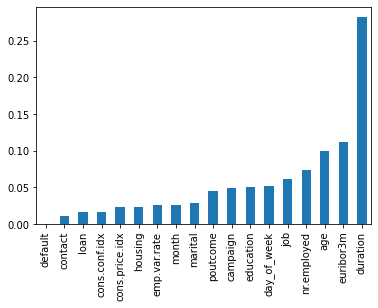

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_important = pd.Series(rfc.feature_importances_, index=X.columns).sort_values()
rfc_important.plot(kind="bar")
plt.show()

DecisionTreeClassifier(random_state=42)

<AxesSubplot:>

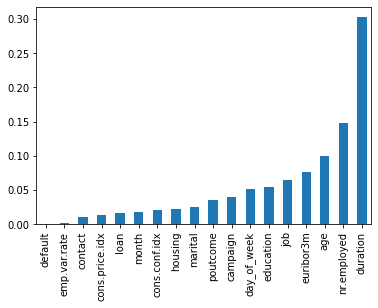

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc_important = pd.Series(dtc.feature_importances_, index=X.columns).sort_values()
dtc_important.plot(kind="bar")
plt.show()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:>

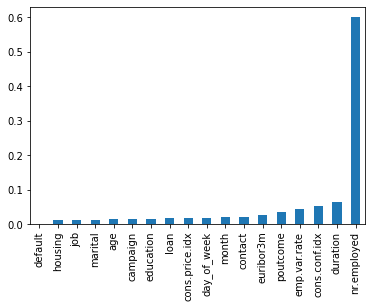

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
xgc = XGBClassifier(random_state=42)
xgc.fit(X_train, y_train)
y_pred = xgc.predict(X_test)
xgc_important = pd.Series(xgc.feature_importances_, index=X.columns).sort_values()
xgc_important.plot(kind="bar")
plt.show()

## GridSearch and Hyperparameter Tuning

#### Limiting to only Random Forest Classifier

In [36]:
#We are right now just limiting ourself to Random Forest Classifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
rfc = RandomForestClassifier(random_state=42)

params = {"max_features" : ["auto","sqrt","log2"],
          "max_depth" :[6,7,8],
          "criterion" : ["gini","entropy"]}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_search_model = GridSearchCV(rfc, param_grid=params)

grid_search_model.fit(X_train, y_train)

print("Best parameters: ", grid_search_model.best_params_)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


## After feature selection and best parameters we will take those attribute and work around it.

But before that we will execute SMOTE because our dataset is imabalaced.

<b> SMOTE will be applied only on Training Data -- not on the validation set </b>

In [37]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc

In [38]:
#function for SMOTE and random classifier model, with all the 18 independent variables

def grid_search_random_forest_smote(dataframe, target):
    
    X_train, X_test, y_train, y_test = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    #using smote
    smote = SMOTE()
    
    X_sm, y_sm = smote.fit_sample(X_train, y_train)
    
    rfc = RandomForestClassifier( n_estimators=11,
                                  max_features="auto",
                                  max_depth=8,
                                  criterion="entropy",
                                  random_state=42)
    
    rfc.fit(X_sm, y_sm)
    
    y_pred = rfc.predict(X_test)
    
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    
    print("Classification Report: ", classification_report(y_test, y_pred))
    
    visualizer = roc_auc(rfc, X_sm, y_sm, X_test, y_test)

Confusion Matrix:  [[7522 1201]
 [ 174  988]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.86      0.92      8723
           1       0.45      0.85      0.59      1162

    accuracy                           0.86      9885
   macro avg       0.71      0.86      0.75      9885
weighted avg       0.92      0.86      0.88      9885



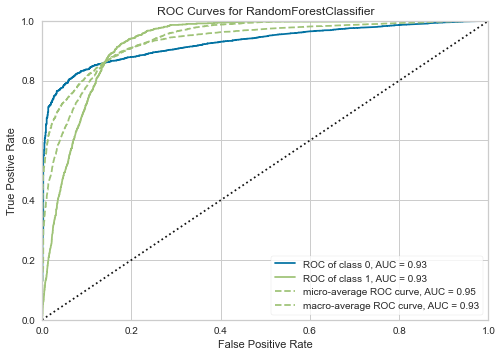

In [39]:
grid_search_random_forest_smote(X, y)

## Applying "grid_search_random_forest_smote" function only on selected feature we got from RFE

In [40]:
X1 = X[['age','job','education','day_of_week','duration','campaign','euribor3m','nr.employed']]

Confusion Matrix:  [[7356 1367]
 [ 139 1023]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.84      0.91      8723
           1       0.43      0.88      0.58      1162

    accuracy                           0.85      9885
   macro avg       0.70      0.86      0.74      9885
weighted avg       0.92      0.85      0.87      9885



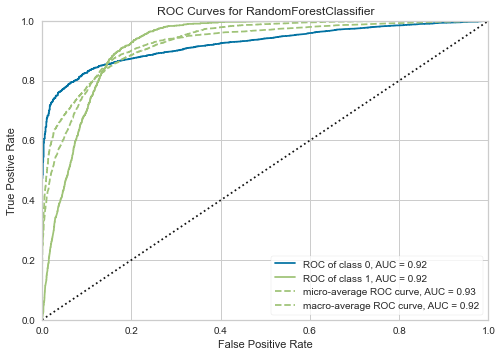

In [41]:
grid_search_random_forest_smote(X1, y)

## Applying "grid_search_random_forest_smote" function only on selected feature we got from RF impotant feature

In [42]:
X2 = X[['duration','euribor3m','age','nr.employed','job','day_of_week','campaign','education','marital','poutcome']]


Confusion Matrix:  [[7381 1342]
 [ 132 1030]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.85      0.91      8723
           1       0.43      0.89      0.58      1162

    accuracy                           0.85      9885
   macro avg       0.71      0.87      0.75      9885
weighted avg       0.92      0.85      0.87      9885



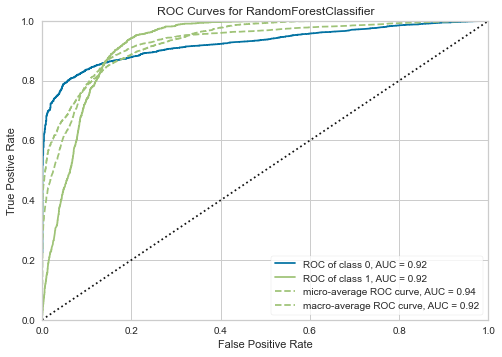

In [43]:
grid_search_random_forest_smote(X2,y)

## Ensembling

Ensemble learning uses multiple machine learning models to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. In the below task, we have used an ensemble of three models - RandomForestClassifier(), GradientBoostingClassifier(), LogisticRegression(). Feel free to modify this function as per your requirements and fit more models or change the parameters for every model.

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('RF', RandomForestClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                          

Confusion Matrix:  [[7883  840]
 [ 272  890]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.90      0.93      8723
           1       0.51      0.77      0.62      1162

    accuracy                           0.89      9885
   macro avg       0.74      0.83      0.77      9885
weighted avg       0.91      0.89      0.90      9885



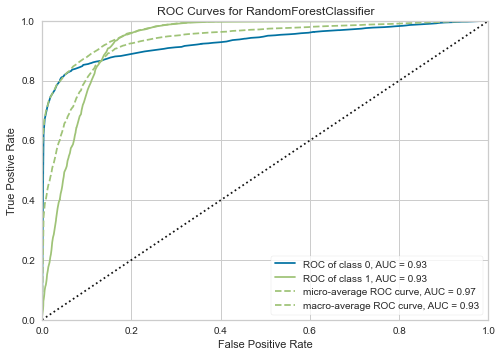

In [44]:
from sklearn.ensemble import VotingClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
    
#using smote
smote = SMOTE()
    
X_sm, y_sm = smote.fit_sample(X_train, y_train)

model_LR = LogisticRegression()
model_RF = RandomForestClassifier()
model_XG = XGBClassifier()

#fitting
model_final = VotingClassifier(estimators=[("LR", model_LR), ("RF", model_RF), ("XGB", model_XG)], voting="soft")

model_final.fit(X_sm, y_sm)

y_pred = model_final.predict(X_test)
    
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    
print("Classification Report: ", classification_report(y_test, y_pred))

visualizer = roc_auc(rfc, X_sm, y_sm, X_test, y_test)

In [45]:
#For easiness, Test data is already processed and imported here. So, Using only the best model to predict and see how its performaning on test set
test1 = pd.read_csv("test.csv", delimiter=",")
Id = test1[["Id"]]
test = pd.read_csv("test_preprocessed.csv", delimiter=",")
test.drop("Id",1,inplace=True)

## Using our last model we will predict and write the file

In [46]:
y_pred = model_final.predict(test)
prediction = pd.DataFrame(y_pred, columns = ["y"])
submission = pd.concat([Id, prediction["y"]], 1)
submission.to_excel("Summitted.xlsx", sheet_name="Output",index=False)